# LOAN PREDICTION

Understanding the problem statement is the first and foremost step. This would help us to give an intuition of what you will face ahead of time. Let us see the problem statement -

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not.In a classification problem,we have to predict discrete values based on a given set of independent variables.Classification can be of two types

1)BINARY Classification : In this classification we have to predict either of the two given classes.For xample:classifying the gender as male or female ,predicting the result as win or loss etc.

2)MULTICLASS Classification : Here we have to classify the data into three or more classes.For example : Classifying a movie's genre as comedy,action or romantic,classify fruits as oranges apples,or pears,etc

Loan prediction is a very common real life problem that each retail bank faces atleast once in its lifetime.If done correctly,it can save a lot of man hours at the end of retail bank.

Although this project is specifically built to give you a walkthrough of Loan Prediction Problem.This content will give a comprehensive overview to solve a classification problem

We will now know about hypothesis generation.It is the process of listing out the possible factors that is affecting the outcome.

# What is Hypothesis Generation?

This is the very important stage in any of the DataScience/Macjine Learning pipeline.It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome

Below are some of the factors which can affect the loan approval (dependent variable for this Loan Prediction Problem)

1) SALARY : Applicant with high income should have more chances with Loan approval

2)PREVIOUS HISTORY : Applicants who have repayed their previous debts should have higher chances of loan approval

3)LOAN AMOUNT : Loan Approval should also depend on the loan amount.If the loan amount is less chances of loan approval is high.

4)LOAN TERM : Loan for less time period and less amount should have higher chances of approval.

5)EMI : Lesser the amount to be paid monthly to repay the loan,higher the chances of Loan approval.

# Specifications

Python=3.7

pandas=0.20.3

seaborn=1.0.0

sklearn = 0.19.1

# Loading packages

In [2]:
import csv   # To import CSV files
import pandas as pd
import numpy as np   # For mathematical calculations
import matplotlib.pyplot as plt   # For Plotting Graph
import seaborn as sns   # For data visualization
%matplotlib notebook
import os
os.chdir("C:\\Users\\Hemalatha\\Desktop\\Analytics vidhya\\Loan Prediction hackathon")
import warnings  ##To Avoid warning
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None) ## To display all the columns in the dataset

# Data

We have taken three CSV files,Train,Test,Sample Submission file

1)Train file will be used for training the model,i.e our model will learn from this file,It contains all the independent variable and the target variable.

2)Test file contains all the independent variable but not the dependent variable.We will apply the model to predict the target variable for the test data.

3)Sample Submission file contains the format in which we have to submit our prediction.

# Reading data

In [3]:
train=pd.read_csv('train_ctrUa4K.csv') ##Read the train dataset

In [4]:
test=pd.read_csv('test_lAUu6dG.csv') ## Read the test dataset

# We can make the copy of the Train and Test data,so that if we make any change in the dataset will not affect the original dataset.

In [5]:
df_train=train.copy() ## Create a copy of original train and test
df_test=test.copy()


# To find the structure and shape of Train and Test Dataset

In [6]:
train.columns ## Display th e columns in train

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.shape ## Display the shape train

(614, 13)

In [8]:
test.columns  ## Display th e columns in test

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
test.shape  ## Display the shape test

(367, 12)

To print the datatype of each variable

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# To find the count of categories in the target variable ,in order to find whether the dataset is imbalanced or not 

In [11]:
train['Loan_Status'].value_counts() 

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

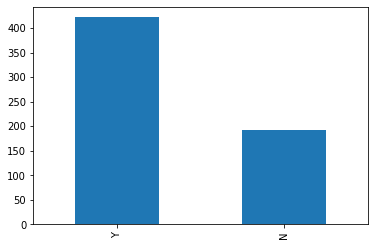

In [13]:
train['Loan_Status'].value_counts().plot.bar()

# To find the first 5 rows of the dataset

In [14]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# To find the statistical information of both numerical and categorical variable of the dataset

In [15]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002181,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# To find the numerical features in the dataset

In [16]:
num_feature=[feature for feature in train.columns if train[feature].dtype!='O']

In [17]:
num_feature

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# To find the individual count of the variables 

In [18]:
train['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [19]:
train['CoapplicantIncome'].value_counts()


0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [20]:
train['LoanAmount'].value_counts()


120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [21]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# To print the categorical variables alone from the dataset

In [23]:
category_feature=[feature for feature in train.columns if train[feature].dtype=='O']

In [24]:
category_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# To print the Individual categories of the categorical variable

In [25]:
for feature in category_feature:
    print("the feature is {} and the number of category are {}".format(feature,train[feature].unique()))

the feature is Loan_ID and the number of category are ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP0012

# Target Variable

We can find the Frequency table,percentage distribution nad barplot for the target variable Loan _status

In [26]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
train['Loan_Status'].value_counts(normalize=True) # normalizing the feature values

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

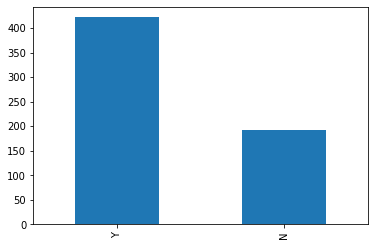

In [28]:
train['Loan_Status'].value_counts().plot.bar()

We have 3 different types of variables like categorical,Ordinal and Numerical 

1) Categorical Feature : These features have categories like 'Gender','Married','Self_Employed','Credit_History','Loan_Status'.
    
2)Ordinal Feature : Variables in categorical Features having some order involved (Dependents,Education,Property_Area)
    
3)Numerical Features : These features have the numerical values(Applicant Income,Coapplicant Income,Loanamount,Loan_Amount_Term)

# Visualization of independent categorical variable

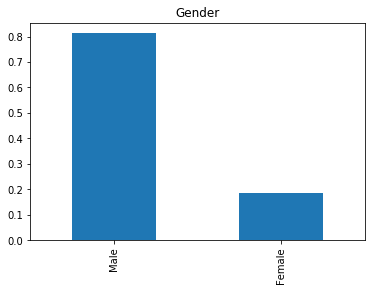

In [29]:

train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')


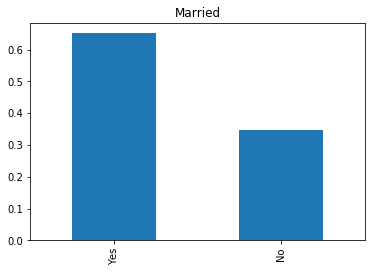

In [30]:

train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')


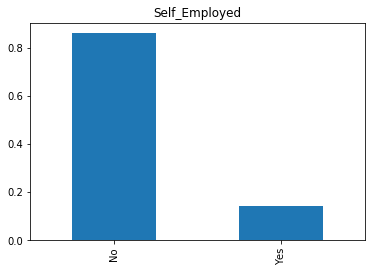

In [31]:

train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')


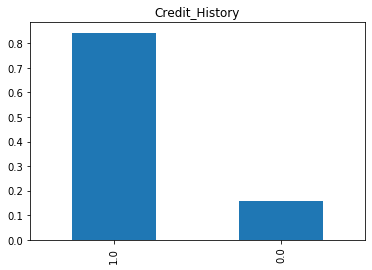

In [32]:

train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')


It can be inferred from the above bar plots that

1)80% applicant in the dataset are Male.

2)Around 65% of the applicant in the dataset are Married.

3)Around 15% of the applicant in the dataset are Self Employed.

4)Around 85% of the applicants have repayed thier debts.

# Visualization of independent categorical variable(ordinal)

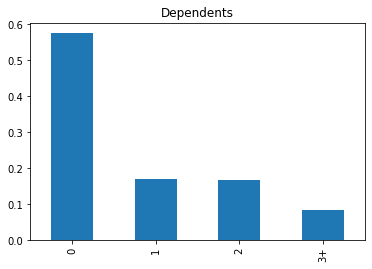

In [33]:
train['Dependents'].value_counts(normalize=True).plot.bar( title= 'Dependents') 


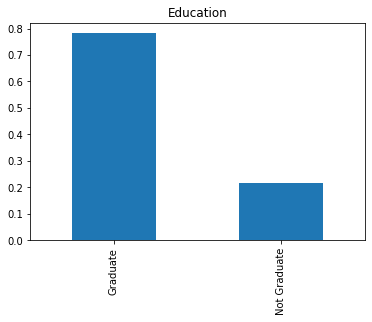

In [34]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 


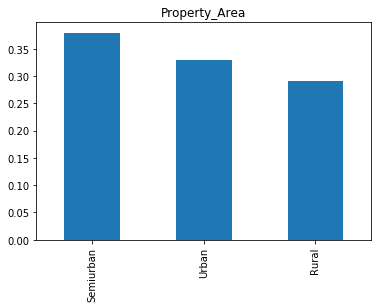

In [35]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

It can be inferred from the above bar plots that

1)Most of the Applicants dont have any dependents.

2)Around 80% of the applicant are graduate.

3)Most of the applicant are from semi Urban Area.

# Visualization of independent Numerical variable variable

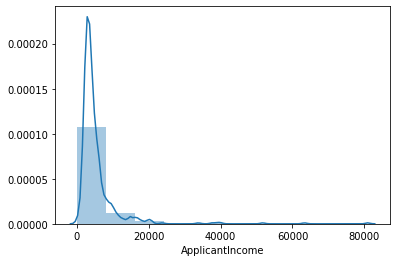

In [36]:
sns.distplot(train['ApplicantIncome'],kde=True,bins=10)
 


It can be inferred that most of the data in the distribution of the applicant income is towards the left which means it is not normally distributed

Boxplot confirms the presence of lot of outliers/extreme values.This can be attributed to the income disparity in the society.Part of this can be driven by the fact that we are looking at people at different educational level,let us segregate them by Education



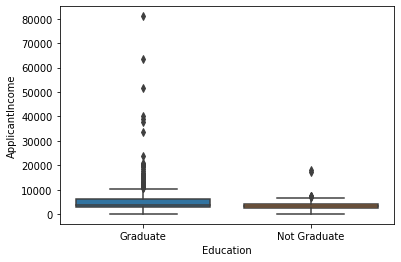

In [37]:
sns.boxplot('Education','ApplicantIncome',data=train)

We can see that there are higher number of graduates with higher income incomes,which are appearing to be the outlier.

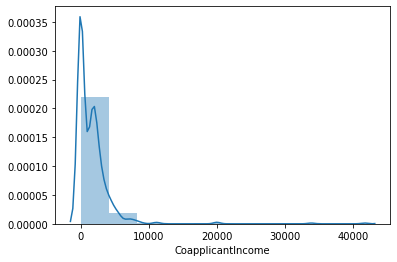

In [38]:
sns.distplot(train['CoapplicantIncome'],kde=True,bins=10); 


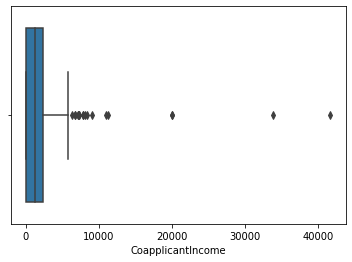

In [39]:
sns.boxplot('CoapplicantIncome',data=train)
plt.show()

We see the similar distribution as that of applicant income .Majority of coapplicant income ranges from 0 to 5000.We can also see lot of outliers and it is not normally distributed.

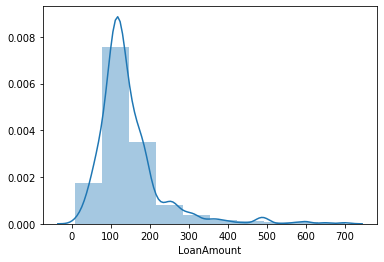

In [40]:

sns.distplot(train['LoanAmount'],kde=True,bins=10)


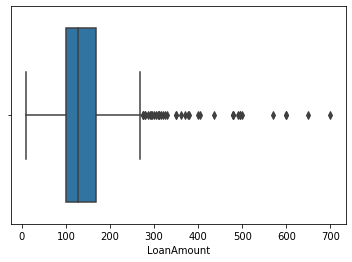

In [41]:
sns.boxplot('LoanAmount',data=train)


We can see lot of outlier in this variable and the distribution is fairly normal


Now we can see how well the features are corelating with the Target Variable(Loan_Status)

# Categorical Independent Variable vs Target Variable

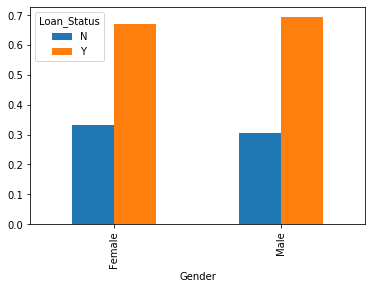

In [42]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)

It can be inferred that the proportion of the male and female is more or less same for both approved and unapproved loans

Now we can visualize the other categorical variable with Target variable.

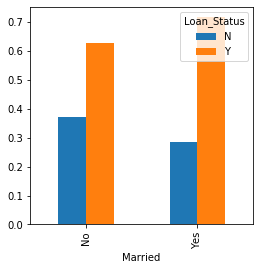

In [43]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4)) 

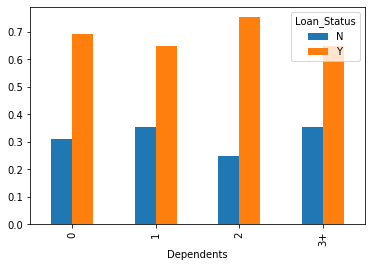

In [44]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 


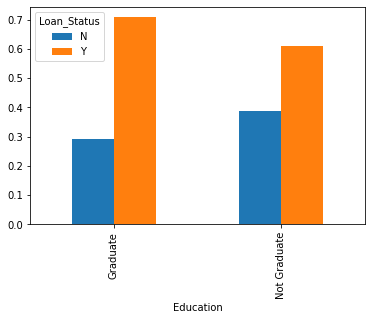

In [45]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)


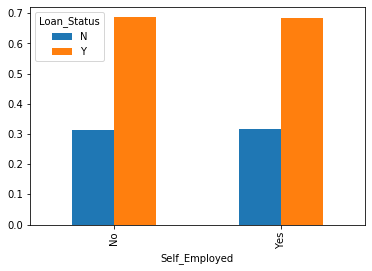

In [46]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 


1)Proportion of married applicants is higher for approval loans.

2)Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

3)Ther is nothing significant we can infer from self employed Vs Loan_Status

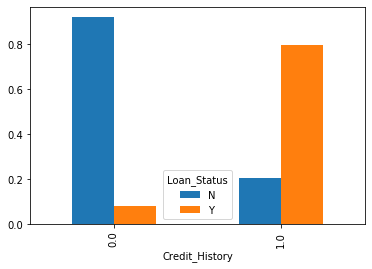

In [47]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False )

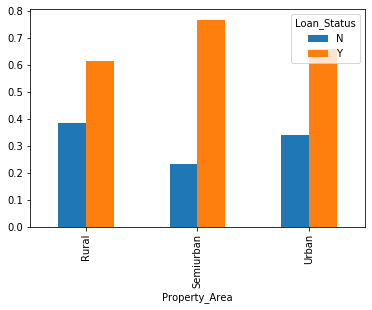

In [48]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False) 


It seems people with credit history as 1 are more likely to get their loans approved.

Proportion of loan getting approved in semiurban area is higher as compared to that in rural or urban areas.


# Creating 3 features total Income,EMI,Balance Income

We are creating 3 new features like Total Income by combining ApplicantIncome+CoapplicantIncome,EMI by dividing Loan+Amount with Loan_Amount_term,Balance Income by Total Income divided by EMI*1000

In [49]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

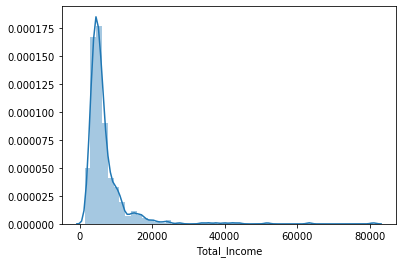

In [50]:
sns.distplot(train['Total_Income'])

In [51]:
train['Total_Income_log'] = np.log(train['Total_Income']) # Normalizing the feature value
test['Total_Income_log'] = np.log(test['Total_Income'])

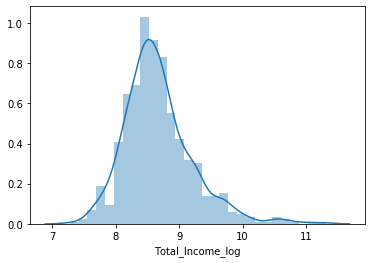

In [52]:
sns.distplot(train['Total_Income_log'])

In [53]:

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [54]:
train['EMI'].fillna(train['EMI'].mean(), inplace=True)
test['EMI'].fillna(test['EMI'].mean(), inplace=True)

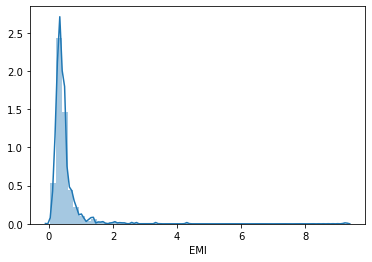

In [55]:
sns.distplot(train['EMI'])

In [56]:
train['EMI'].shape

(614,)

In [57]:
train['EMI'].isnull().sum()

0

In [58]:
train['EMI_log']=np.log(train['EMI'])
test['EMI_log']=np.log(test['EMI'])

In [59]:
train['EMI_log'].fillna(train['EMI_log'].mean(), inplace=True)
test['EMI_log'].fillna(test['EMI_log'].mean(), inplace=True)

In [60]:
train['EMI_log'].isnull().sum()

0

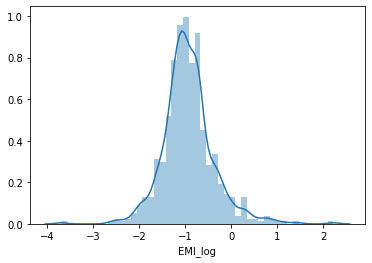

In [61]:

sns.distplot(train['EMI_log'])

In [62]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)


In [63]:
train['Balance Income'].fillna(train['Balance Income'].mean(), inplace=True)
test['Balance Income'].fillna(test['Balance Income'].mean(), inplace=True)

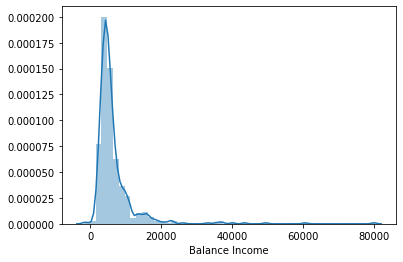

In [64]:
sns.distplot(train['Balance Income'])

In [65]:
train['Balance Income_log']=np.log(train['Balance Income'])
test['Balance Income_log']=np.log(test['Balance Income'])

In [66]:
train['Balance Income_log'].fillna(train['Balance Income_log'].mean(), inplace=True)
test['Balance Income_log'].fillna(test['Balance Income_log'].mean(), inplace=True)

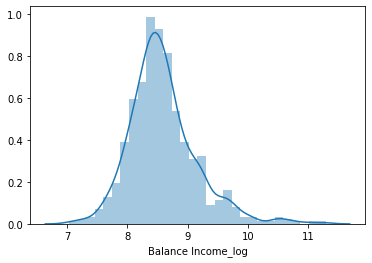

In [67]:
sns.distplot(train['Balance Income_log'])

In [68]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [69]:
train=train.drop(['Total_Income','EMI','Balance Income'], axis=1) 
test=test.drop(['Total_Income','EMI','Balance Income'], axis=1)

# Missing Value and Outlier Treatment

In [70]:
train.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Credit_History        50
Property_Area          0
Loan_Status            0
Total_Income_log       0
EMI_log                0
Balance Income_log     0
dtype: int64

There are Missing Values in the Gender,Married,and Dependents,Self Employed and Loan amount,Loan_amount_term and credit_History Features.

We can consider two methods for treating Missing Values

1)Numerical Variables : Imputation Using Mean and Median
    
2)Categorical variable : Imputation using Mode.

In [71]:
test.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Credit_History        29
Property_Area          0
Total_Income_log       0
EMI_log                0
Balance Income_log     0
dtype: int64

In [72]:
train['Gender']=train['Gender'].fillna('Male')
test['Gender']=test['Gender'].fillna('Male')

train['Married']=train['Married'].fillna('Yes')
test['Married']=test['Married'].fillna('Yes')

train['Dependents']=train['Dependents'].fillna(0)
test['Dependents']=test['Dependents'].fillna(0)

train['Self_Employed']=train['Self_Employed'].fillna('No')
test['Self_Employed']=test['Self_Employed'].fillna('No')

train['Credit_History']=train['Credit_History'].fillna(1)
test['Credit_History']=test['Credit_History'].fillna(1)



In [73]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [74]:
print(train.isnull().sum())
print(test.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income_log      0
EMI_log               0
Balance Income_log    0
dtype: int64
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Total_Income_log      0
EMI_log               0
Balance Income_log    0
dtype: int64


In [75]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI_log,Balance Income_log
count,614,614,614,614,614,614,614.000000,614,614,614.000000,614.000000,614.000000
unique,614,2,2,5,2,2,NaN,3,2,NaN,NaN,NaN
top,LP002181,Male,Yes,0,Graduate,No,NaN,Semiurban,Y,NaN,NaN,NaN
freq,1,502,401,345,480,532,NaN,233,422,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.855049,NaN,NaN,8.669414,-0.928234,8.590304
std,NaN,NaN,NaN,NaN,NaN,NaN,0.352339,NaN,NaN,0.545102,0.562041,0.562621
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,7.273786,-3.688879,7.035073
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,8.334712,-1.232144,8.244246
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,8.597205,-0.980829,8.518824
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,8.925549,-0.693147,8.846999


# Numerical Independent Variable vs Target Variable

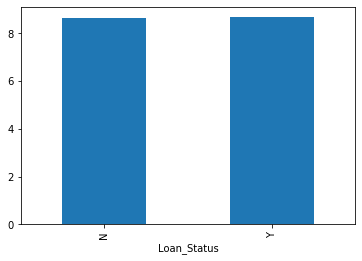

In [76]:
train.groupby('Loan_Status')['Total_Income_log'].mean().plot.bar()

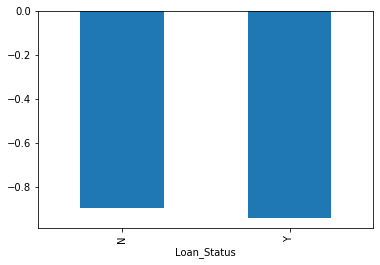

In [77]:
train.groupby('Loan_Status')['EMI_log'].mean().plot.bar()

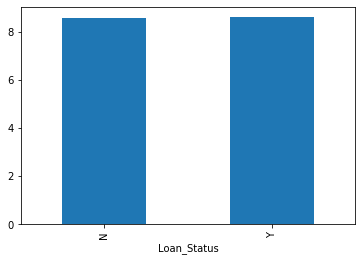

In [78]:
train.groupby('Loan_Status')['Balance Income_log'].mean().plot.bar()

In [79]:
#train['Dependents'].replace('3+', 3,inplace=True) 
#test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

# Heat Map correlation

Heat Map is used to find the correlation between the Numerical features

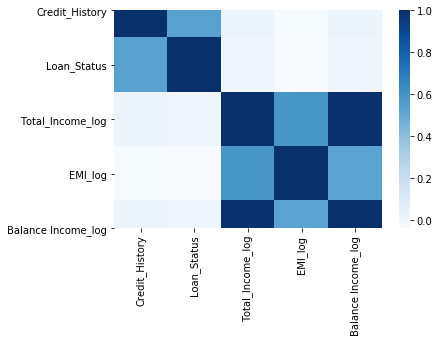

In [80]:
sns.heatmap(train.corr(),cmap="Blues")

# Logit regression model building

Let us build our first model to predict the Target variable.

Logit Regression is used to predict the binary outcomes.
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

We can drop Loan_ID which does not make any effect on Loan_Status

In [81]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)


In [82]:
X = train.drop('Loan_Status',1) #Independent Variable
y = train.Loan_Status #Dependent variable


# Onehot encoding

In [83]:

train=pd.get_dummies(train,drop_first=True) 
test=pd.get_dummies(test,drop_first=True)
X=pd.get_dummies(X,drop_first=True) 

In [84]:
X.shape

(614, 14)

In [85]:
X.head(2)

,Credit_History,Total_Income_log,EMI_log,Balance Income_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,8.674026,-0.733345,8.588341,1,0,1,0,0,0,0,0,0,1
1,1.0,8.714568,-1.034074,8.654421,1,1,0,1,0,0,0,0,0,0


In [86]:
train.shape

(614, 15)

In [87]:
train.head(2)

,Credit_History,Loan_Status,Total_Income_log,EMI_log,Balance Income_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,8.674026,-0.733345,8.588341,1,0,1,0,0,0,0,0,0,1
1,1.0,0,8.714568,-1.034074,8.654421,1,1,0,1,0,0,0,0,0,0


In [88]:
test.shape

(367, 14)

In [89]:
test.head(2)

,Credit_History,Total_Income_log,EMI_log,Balance Income_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,8.651724,-1.185624,8.596826,1,1,1,0,0,0,0,0,0,1
1,1.0,8.428581,-1.049822,8.349011,1,1,0,1,0,0,0,0,0,1


# Standardization

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaling=StandardScaler()

In [92]:
scaling.fit_transform(train[['Total_Income_log','EMI_log','Balance Income_log']])

array([[ 0.00846848,  0.34703568, -0.00349157],
       [ 0.08290346, -0.18846633,  0.11405351],
       [-1.21736328, -1.36794461, -1.15090315],
       ...,
       [ 0.65369887,  1.02481583,  0.61692547],
       [ 0.48516845,  0.48655058,  0.48455728],
       [-0.43936693, -0.12023273, -0.4344684 ]])

# Model Building

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [94]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [95]:
pred_lr = model.predict(x_test)

In [96]:
accuracy_score(y_test,pred_lr)

0.8378378378378378

# Logit Regression prediction for test dataset

In [97]:
pred_LR = model.predict(test)

In [98]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [99]:
submission['Loan_Status']=pred_LR 
submission['Loan_ID']=df_test['Loan_ID']

In [100]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [101]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logit_prediction.csv')

# Linear Regresion with Strtified K fold CrossValidation

In [102]:
from sklearn.model_selection import StratifiedKFold

In [103]:
i=1 
kf=StratifiedKFold()
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_SLR = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]
   


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7950819672131147


In [104]:
 score.mean()

0.7950819672131147

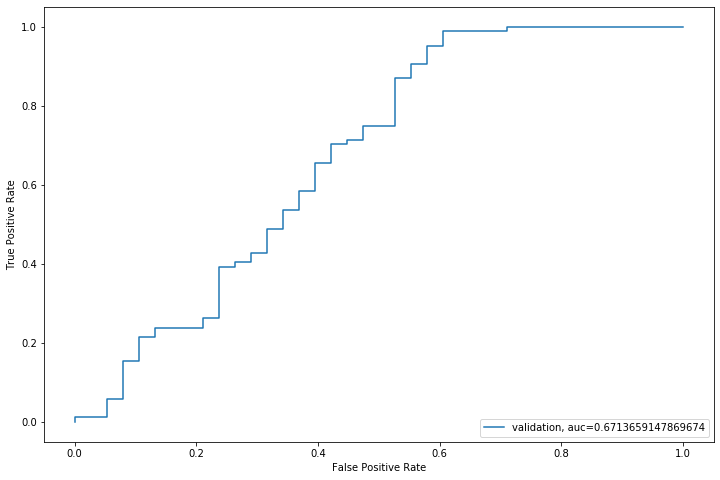

In [105]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [106]:
submission['Loan_Status']=pred_SLR            
# filling Loan_Status with predictions 
submission['Loan_ID']=df_test['Loan_ID'] 
# filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logit_skf_prediction.csv')

# Decision Tree 

 Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree,testing the attribute specified by this node,then moving down the tree branch corresponding to the value of the attribute as shown in the above figure.This process is then repeated for the subtree rooted at the new node.

In [107]:
from sklearn import tree

In [108]:
i=1 
kf=StratifiedKFold()
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_DT = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.7398373983739838

3 of kfold 5
accuracy_score 0.6829268292682927

4 of kfold 5
accuracy_score 0.7317073170731707

5 of kfold 5
accuracy_score 0.6967213114754098


In [109]:
score.mean()

0.6967213114754098

# Submission file for Decision Tree

In [110]:
pred_DT = model.predict(test)
submission['Loan_Status']=pred_DT  
# filling Loan_Status with predictions 
submission['Loan_ID']=df_test['Loan_ID']
# filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DT_prediction.csv')

# RandomForest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
i=1 
kf=StratifiedKFold()
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_RF = model.predict(test)
   


1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7868852459016393


In [113]:
 score.mean()

0.7868852459016393

# Submission file for Random Forest

In [114]:
submission['Loan_Status']=pred_RF # filling Loan_Status with predictions 
submission['Loan_ID']=df_test['Loan_ID']
# filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

#  RandomForest_GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [117]:
RF_GSCV = GridSearchCV(estimator=grid_search, param_grid=paramgrid, cv= 5)

In [118]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [119]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [120]:
model=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [121]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [122]:
pred=model.predict(x_test)

In [123]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8540540540540541


In [124]:
i=1 
kf=StratifiedKFold()
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)     
    grid_search.fit(xtr, ytr)     
    pred_test = grid_search.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_RF_GSCV =grid_search.predict(test) 
    pred2=grid_search.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7786885245901639


In [125]:
score.mean()

0.7786885245901639

# Submission file for RF_GridSearchCV

In [126]:
submission['Loan_Status']=pred_RF_GSCV # filling Loan_Status with predictions 
submission['Loan_ID']=df_test['Loan_ID']
# filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RF_GridSearchCV.csv')

# Feature Importance Plot

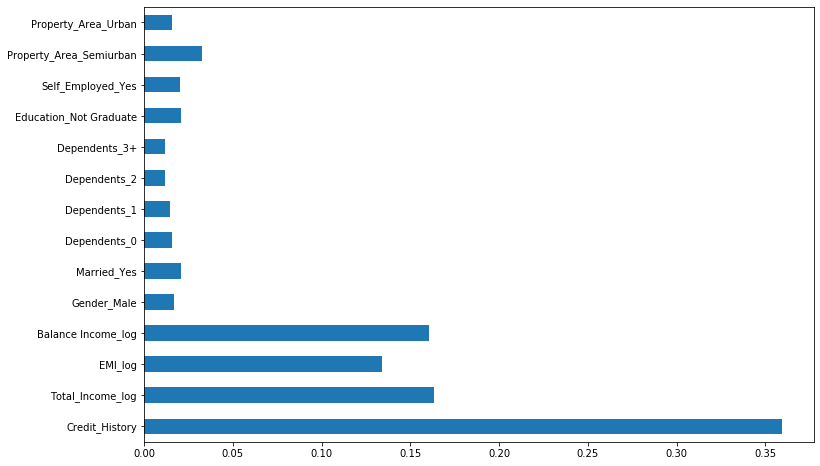

In [127]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

# AdaBoostClassifier

In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [129]:
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1)
model=abc.fit(x_train,y_train)
y_pred_adaboost=model.predict(x_test)

In [130]:
abc

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [131]:
y_pred_adaboost

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_adaboost))

Accuracy: 0.8378378378378378


In [133]:
i=1 
kf=StratifiedKFold()
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    abc=AdaBoostClassifier(n_estimators=50,learning_rate=1)    
    abc.fit(xtr, ytr)     
    pred_test = abc.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_adaboost = abc.predict(test) 
    pred3=abc.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.7642276422764228

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.7622950819672131


In [134]:
score.mean()

0.7622950819672131

# Submission File for AdaBoost

In [135]:
submission['Loan_Status']=pred_adaboost # filling Loan_Status with predictions 
submission['Loan_ID']=df_test['Loan_ID']
# filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('AdaBoost.csv')

# XGBoost

In [136]:
from xgboost import XGBClassifier
i=1 
kf=StratifiedKFold()
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7622950819672131


In [137]:
score.mean()

0.7622950819672131

# Submission file for XGBoost

In [138]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=df_test['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')